# Task 1: Define the Problem

Dataset: https://data.cms.gov/provider-data/topics/hospitals
- The datasets being used is the **IPFQR_QualityMeasures_Facility.csv** and **IPFQR_QualityMeasures_National.csv**
- The Inpatient Psychiatric Facility Quality Reporting (IPFQR) Program is a program aimed to provide public information regarding inpatient psychiatric care. This information contains quality measures used to assess and promote the improvement of care provided to patients with mental illnesses. 
- What is Inpatient care? Inpatient care is the care of patients whose condition requires admission to a hospital, i.e., all the care they need is provided within their living facilites. 


Thus, using this dataset, I am analyzing the quality of Inpatient Psychiatric Facilities nationwide.  
- Where are these facilities located?
- How do these facilities compare to one another? 
- What facilities perform better than the national average(s)?

# Task 2: Install Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Task 3: Load the Data

In [2]:
hospital = pd.read_csv("IPFQR_QualityMeasures_Facility.csv", na_values = "Not Available")

File was read-in using the na_values parameter to read in "Not Available" entries as nulls (to not create mixed dtypes in columns). 

# Task 4: Perform Data Exploratory Analysis (EDA)

## Show the Data

In [3]:
hospital.head(2)

Facility ID                Facility Name              Address     City  \
0        10007     MIZELL MEMORIAL HOSPITAL        702 N MAIN ST      OPP   
1        10008  CRENSHAW COMMUNITY HOSPITAL  101 HOSPITAL CIRCLE  LUVERNE   

  State  ZIP Code County Name      HBIPS-2 Measure Description  \
0    AL     36467   COVINGTON  Hours of physical-restraint use   
1    AL     36049    CRENSHAW  Hours of physical-restraint use   

   HBIPS-2 Overall Rate Per 1000  HBIPS-2 Overall Num  ...  IMM-2 Denominator  \
0                           0.00                  0.0  ...              160.0   
1                           0.04                  3.7  ...              250.0   

   IMM-2 Footnote Flu Season Start Date  Flu Season End Date  \
0             NaN            10/01/2020           03/31/2021   
1             NaN            10/01/2020           03/31/2021   

              IPFQR-HCP COVID-19 Measure Description  IPFQR-HCP COVID-19 %  \
0  Percentage of healthcare personnel who complet...                  59.8   
1  Percentage of healthcare personnel who complet...                  53.2   

   IPFQR-HCP COVID-19 Denominator IPFQR-HCP COVID-19 Footnote  \
0                            32.0                         NaN   
1                           180.0                         NaN   

   IPFQR-HCP COVID-19 Start Date  IPFQR-HCP COVID-19 End Date  
0                     10/01/2021                   12/31/2021  
1                     10/01/2021                   12/31/2021  

[2 rows x 99 columns]

## Get Data Info

In [4]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 99 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Facility ID                             1563 non-null   int64  
 1   Facility Name                           1563 non-null   object 
 2   Address                                 1563 non-null   object 
 3   City                                    1563 non-null   object 
 4   State                                   1563 non-null   object 
 5   ZIP Code                                1563 non-null   int64  
 6   County Name                             1563 non-null   object 
 7   HBIPS-2 Measure Description             1563 non-null   object 
 8   HBIPS-2 Overall Rate Per 1000           1481 non-null   float64
 9   HBIPS-2 Overall Num                     1481 non-null   float64
 10  HBIPS-2 Overall Den                     1481 non-null   floa

In [5]:
hospital['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

This dataset contains records from DC (District of Columbia) and PR (Puerto Rico). 

## Find Missing Values

In [6]:
hospital.isnull().values.sum()

37735

# Task 5: Perform Data Cleaning

The focus of my project is on the quality of mental health resources nationwide by analyzing the information provided by the Inpatient Psychiatric Facility Quality Reporting (IPFQR) Program.

Columns regarding this scope include (using Measure ID):
1. **FUH-7**: Follow-up after Hospitalization for Mental Illness 7-Days.
2. **FUH-30**: Follow-up after Hospitalization for Mental Illness 30-Days.
3. **HBIPS-2**: Hours of physical restraint use
4. **HBIPS-3**: Hours of seclusion. 
5. **HBIPS-5**: Patients discharged on multiple antipsychotic medications with appropriate justification.
6. **MedCont**: Patients admitted to an inpatient psychiatric facility for major depressive disorder (MDD), schizophrenia, or bipolar disorder who filled at least one prescription between the 2 days before they were discharged and 30 days after they were discharged from the facility. 
7. **READM-30-IPF**: Rate of readmission to facility within 30 days of discharge.
8. **SUB-2**: Alcohol use brief intervention provided or offered.
9. **SUB-3**: Alcohol and other Drug Use Disorder Treatment Provided or Offered at Discharge
10. **TOB-2**: Tobacco Use Treatment Provided or Offered
11. **TOB-3**: Tobacco use treatment provided or offered at discharge
12. **SMD**: Screening for Metabolic Disorders
13. **TR2**: Timely Transmission of Transition Record

Using these 13 measures I will determine what facilites out perform the nationwide average. 

A majority of these measures already contain a percentage that demonstrates what percentage of those within the facility have fallen under a specific measure. Thus, we can structure the data cleaning in the following way:
- Drop columns outside of the scope set above.
- Examine "footnotes"
- Create percentages of measures that do not already have a percentage. 
- Drop columns that are not the percentages. 
- Handle Nulls

In [7]:
#Drop not needed columns from dataset (i.e. columns that are outside the scope and descriptions)
hospital.columns

Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'HBIPS-2 Measure Description',
       'HBIPS-2 Overall Rate Per 1000', 'HBIPS-2 Overall Num',
       'HBIPS-2 Overall Den', 'HBIPS-2 Overall Footnote',
       'HBIPS-3 Measure Description', 'HBIPS-3 Overall Rate Per 1000',
       'HBIPS-3 Overall Num', 'HBIPS-3 Overall Den',
       'HBIPS-3 Overall Footnote', 'HBIPS-5 Measure Description', 'HBIPS-5 %',
       'HBIPS-5 Denominator', 'HBIPS-5 Footnote', 'SMD Measure Description',
       'SMD %', 'SMD Denominator', 'SMD Footnote',
       'SUB-2/-2a Measure Description', 'SUB-2 %', 'SUB-2 Denominator',
       'SUB-2 Footnote', 'SUB-2a %', 'SUB-2a Denominator', 'SUB-2a Footnote',
       'SUB-3/-3a Measure Description', 'SUB-3 %', 'SUB-3 Denominator',
       'SUB-3 Footnote', 'SUB-3a %', 'SUB-3a Denominator', 'SUB-3a Footnote',
       'TOB-2/-2a Measure_Desc', 'TOB-2 %', 'TOB-2 Denominator',
       'TOB-2 Footnote', 'TOB-2a %', 'TOB-2a Denomi

In [8]:
hospital.drop(columns = ['Facility ID', 'Address',
       'County Name', 'HBIPS-2 Measure Description',
       'HBIPS-3 Measure Description', 'HBIPS-5 Measure Description', 'SMD Measure Description',
       'SUB-2/-2a Measure Description', 'SUB-2a %', 'SUB-2a Denominator', 'SUB-2a Footnote',
       'SUB-3/-3a Measure Description', 'SUB-3a %', 'SUB-3a Denominator', 'SUB-3a Footnote',
       'TOB-2/-2a Measure_Desc', 'TOB-2a %', 'TOB-2a Denominator', 'TOB-2a Footnote',
       'TOB-3/-3a Measure Description', 'TOB-3a %', 'TOB-3a Denominator', 'TOB-3a Footnote',
       'TR-1 Measure Description', 'TR-1 %', 'TR-1 Denominator',
       'TR-1 Footnote', 'TR-2 Measure Description',
       'FUH Measure Description','MedCont Measure Desc', 'READM-30-IPF Measure Desc', 'READM-30-IPF Category','IMM-2 Measure Description', 'IMM-2 %', 'IMM-2 Denominator',
       'IMM-2 Footnote', 'Flu Season Start Date', 'Flu Season End Date',
       'IPFQR-HCP COVID-19 Measure Description', 'IPFQR-HCP COVID-19 %',
       'IPFQR-HCP COVID-19 Denominator', 'IPFQR-HCP COVID-19 Footnote',
       'IPFQR-HCP COVID-19 Start Date', 'IPFQR-HCP COVID-19 End Date' ], inplace = True) 

In [9]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Facility Name                  1563 non-null   object 
 1   City                           1563 non-null   object 
 2   State                          1563 non-null   object 
 3   ZIP Code                       1563 non-null   int64  
 4   HBIPS-2 Overall Rate Per 1000  1481 non-null   float64
 5   HBIPS-2 Overall Num            1481 non-null   float64
 6   HBIPS-2 Overall Den            1481 non-null   float64
 7   HBIPS-2 Overall Footnote       82 non-null     float64
 8   HBIPS-3 Overall Rate Per 1000  1481 non-null   float64
 9   HBIPS-3 Overall Num            1481 non-null   float64
 10  HBIPS-3 Overall Den            1481 non-null   float64
 11  HBIPS-3 Overall Footnote       82 non-null     float64
 12  HBIPS-5 %                      997 non-null    f

In [10]:
#The footnotes contained in the hospital dataset are reasonsing behind missing records. 
#We can see the unique footnotes that exist to understand why certain records are missing:
np.unique(hospital[['HBIPS-2 Overall Footnote', 'HBIPS-3 Overall Footnote', 'HBIPS-5 Footnote', 'SMD Footnote', 'SUB-2 Footnote', 'SUB-3 Footnote', 'TOB-2 Footnote', 'TOB-3 Footnote','TR-2 Footnote', 'FUH-30 Footnote', 'FUH-7 Footnote','MedCont Footnote', 'READM-30-IPF Footnote' ]].values)

array([ 1.,  5.,  7., nan])

There are 3 unique footnote values (nan is indicative of a null value, i.e., no footnote is provide because records are not missing in these areas):
- 1: The number of cases/patients is too few to report.
- 5: Results are not available for this reporting period.
- 7: No cases met the criteria for this measure. 

Keeping the footnotes for now, let's modify the hospital dataframe and create a new column from the Num/Den (or rather the numerator and denominator) and create a percentage for each measure (and drop these columns after creating the new percentage columns). We can also drop the denominator columns of measures that already have a percentage. 

In [11]:
#Further clean these datasets by removing "Overall Rate Per 1000" and leftover dates (because dates are same throughout). 
# We can use the Num/Den columns of measures to create percentages
#We can drop the Den columns of measure with percentages
hospital.columns

Index(['Facility Name', 'City', 'State', 'ZIP Code',
       'HBIPS-2 Overall Rate Per 1000', 'HBIPS-2 Overall Num',
       'HBIPS-2 Overall Den', 'HBIPS-2 Overall Footnote',
       'HBIPS-3 Overall Rate Per 1000', 'HBIPS-3 Overall Num',
       'HBIPS-3 Overall Den', 'HBIPS-3 Overall Footnote', 'HBIPS-5 %',
       'HBIPS-5 Denominator', 'HBIPS-5 Footnote', 'SMD %', 'SMD Denominator',
       'SMD Footnote', 'SUB-2 %', 'SUB-2 Denominator', 'SUB-2 Footnote',
       'SUB-3 %', 'SUB-3 Denominator', 'SUB-3 Footnote', 'TOB-2 %',
       'TOB-2 Denominator', 'TOB-2 Footnote', 'TOB-3 %', 'TOB-3 Denominator',
       'TOB-3 Footnote', 'TR-2 %', 'TR-2 Denominator', 'TR-2 Footnote',
       'Start Date', 'End Date', 'FUH-30 %', 'FUH-30 Denominator',
       'FUH-30 Footnote', 'FUH-7 %', 'FUH-7 Denominator', 'FUH-7 Footnote',
       'FUH Measure Start Date', 'FUH Measure End Date', 'MedCont %',
       'MedCont Denominator', 'MedCont Footnote', 'MedCont Measure Start Date',
       'MedCont Measure End Da

In [12]:
#Creating HBIPS-2 % and HBIPS-3 %
hospital['HBIPS-2 %'] = round(100*(hospital['HBIPS-2 Overall Num']/hospital['HBIPS-2 Overall Den']),2)
hospital['HBIPS-3 %'] = round(100*(hospital['HBIPS-3 Overall Num']/hospital['HBIPS-3 Overall Den']),2)
#Dropping the Num/Den columns remaining
hospital.drop(columns = ['HBIPS-2 Overall Num', 'HBIPS-2 Overall Den', 'HBIPS-3 Overall Num', 'HBIPS-3 Overall Den', 'HBIPS-5 Denominator', 'SMD Denominator', 'SUB-2 Denominator', 'SUB-3 Denominator', 'TOB-2 Denominator', 'TOB-3 Denominator','TR-2 Denominator', 'FUH-30 Denominator', 'FUH-7 Denominator', 'MedCont Denominator', 'READM-30-IPF Denominator', 'READM-30-IPF Lower Estimate', 'READM-30-IPF Higher Estimate'], inplace = True) 

In [13]:
#Dropping rest of the not needed columns
hospital.drop(columns = ['HBIPS-2 Overall Rate Per 1000', 'HBIPS-3 Overall Rate Per 1000', 'Start Date', 'End Date', 
                         'FUH Measure Start Date', 'FUH Measure End Date', 'MedCont Measure Start Date', 'MedCont Measure End Date',
                         'READM-30-IPF Start Date', 'READM-30-IPF End Date'], inplace = True)

In [14]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Facility Name             1563 non-null   object 
 1   City                      1563 non-null   object 
 2   State                     1563 non-null   object 
 3   ZIP Code                  1563 non-null   int64  
 4   HBIPS-2 Overall Footnote  82 non-null     float64
 5   HBIPS-3 Overall Footnote  82 non-null     float64
 6   HBIPS-5 %                 997 non-null    float64
 7   HBIPS-5 Footnote          566 non-null    float64
 8   SMD %                     1469 non-null   float64
 9   SMD Footnote              94 non-null     float64
 10  SUB-2 %                   1150 non-null   float64
 11  SUB-2 Footnote            413 non-null    float64
 12  SUB-3 %                   1189 non-null   float64
 13  SUB-3 Footnote            374 non-null    float64
 14  TOB-2 % 

In [15]:
hospital.head(2)

Facility Name     City State  ZIP Code  \
0     MIZELL MEMORIAL HOSPITAL      OPP    AL     36467   
1  CRENSHAW COMMUNITY HOSPITAL  LUVERNE    AL     36049   

   HBIPS-2 Overall Footnote  HBIPS-3 Overall Footnote  HBIPS-5 %  \
0                       NaN                       NaN      100.0   
1                       NaN                       NaN      100.0   

   HBIPS-5 Footnote  SMD %  SMD Footnote  ...  FUH-30 %  FUH-30 Footnote  \
0               NaN  100.0           NaN  ...       NaN              1.0   
1               NaN  100.0           NaN  ...      42.1              NaN   

   FUH-7 %  FUH-7 Footnote  MedCont %  MedCont Footnote  READM-30-IPF Rate  \
0      NaN             1.0        NaN               1.0               17.8   
1      5.3             NaN       82.1               NaN               21.5   

   READM-30-IPF Footnote  HBIPS-2 %  HBIPS-3 %  
0                    NaN       0.00       0.00  
1                    NaN       0.09       0.38  

[2 rows x 30 columns]

There are many nulls in the hospital dataframe. However, we should not simply drop the nulls because we will lose a lot of information. 

Let's see if we can input information into the nulls using the information provided by the footnotes. 

Revisiting the footnotes:
- 1: The number of cases/patients is too few to report.
- 5: Results are not available for this reporting period.
- 7: No cases met the criteria for this measure. 

Based off the reasonsings, we can input 0 for row entries that have footnote 7 and input random values between 1 standard deviation away from the mean for footnotes 1 & 5, so that we don't lose any valuable information from just dropping the nulls.  

In [16]:
hospital.loc[hospital['HBIPS-2 Overall Footnote'] == 7, 'HBIPS-2 %'] = 0

In [17]:
hbips2_avg = hospital['HBIPS-2 %'].mean()
hbips2_std = hospital['HBIPS-2 %'].std()
hbips2_null_count = hospital['HBIPS-2 %'].isnull().sum()
hbips2_null_random_list = np.random.randint(hbips2_avg - hbips2_std, hbips2_avg + hbips2_std, size=hbips2_null_count)
hospital.loc[np.isnan(hospital['HBIPS-2 %']), 'HBIPS-2 %'] = hbips2_null_random_list
hospital['HBIPS-2 %'] = hospital['HBIPS-2 %'].astype(float)

In [18]:
hospital.head(2)

Facility Name     City State  ZIP Code  \
0     MIZELL MEMORIAL HOSPITAL      OPP    AL     36467   
1  CRENSHAW COMMUNITY HOSPITAL  LUVERNE    AL     36049   

   HBIPS-2 Overall Footnote  HBIPS-3 Overall Footnote  HBIPS-5 %  \
0                       NaN                       NaN      100.0   
1                       NaN                       NaN      100.0   

   HBIPS-5 Footnote  SMD %  SMD Footnote  ...  FUH-30 %  FUH-30 Footnote  \
0               NaN  100.0           NaN  ...       NaN              1.0   
1               NaN  100.0           NaN  ...      42.1              NaN   

   FUH-7 %  FUH-7 Footnote  MedCont %  MedCont Footnote  READM-30-IPF Rate  \
0      NaN             1.0        NaN               1.0               17.8   
1      5.3             NaN       82.1               NaN               21.5   

   READM-30-IPF Footnote  HBIPS-2 %  HBIPS-3 %  
0                    NaN       0.00       0.00  
1                    NaN       0.09       0.38  

[2 rows x 30 columns]

In [19]:
#Checking to see if we cleared all the nulls from HBIPS-2 %
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Facility Name             1563 non-null   object 
 1   City                      1563 non-null   object 
 2   State                     1563 non-null   object 
 3   ZIP Code                  1563 non-null   int64  
 4   HBIPS-2 Overall Footnote  82 non-null     float64
 5   HBIPS-3 Overall Footnote  82 non-null     float64
 6   HBIPS-5 %                 997 non-null    float64
 7   HBIPS-5 Footnote          566 non-null    float64
 8   SMD %                     1469 non-null   float64
 9   SMD Footnote              94 non-null     float64
 10  SUB-2 %                   1150 non-null   float64
 11  SUB-2 Footnote            413 non-null    float64
 12  SUB-3 %                   1189 non-null   float64
 13  SUB-3 Footnote            374 non-null    float64
 14  TOB-2 % 

Now we can fill in the nulls for the rest of columns according to their footnotes and then drop the footnotes.

In [20]:
#HBIPS-3 %
hospital.loc[hospital['HBIPS-3 Overall Footnote'] == 7, 'HBIPS-3 %'] = 0

In [21]:
hbips3_avg = hospital['HBIPS-3 %'].mean()
hbips3_std = hospital['HBIPS-3 %'].std()
hbips3_null_count = hospital['HBIPS-3 %'].isnull().sum()
hbips3_null_random_list = np.random.randint(hbips3_avg - hbips3_std, hbips3_avg + hbips3_std, size=hbips3_null_count)
hospital.loc[np.isnan(hospital['HBIPS-3 %']), 'HBIPS-3 %'] = hbips3_null_random_list
hospital['HBIPS-3 %'] = hospital['HBIPS-3 %'].astype(float)

In [22]:
#HBIPS-5 %
hospital.loc[hospital['HBIPS-5 Footnote'] == 7, 'HBIPS-5 %'] = 0

In [23]:
hbips5_avg = hospital['HBIPS-5 %'].mean()
hbips5_std = hospital['HBIPS-5 %'].std()
hbips5_null_count = hospital['HBIPS-5 %'].isnull().sum()
hbips5_null_random_list = np.random.randint(hbips5_avg - hbips5_std, hbips5_avg + hbips5_std, size=hbips5_null_count)
hospital.loc[np.isnan(hospital['HBIPS-5 %']), 'HBIPS-5 %'] = hbips5_null_random_list
hospital['HBIPS-5 %'] = hospital['HBIPS-5 %'].astype(float)

In [24]:
#SMD %
hospital.loc[hospital['SMD Footnote'] == 7, 'SMD %'] = 0

In [25]:
smd_avg = hospital['SMD %'].mean()
smd_std = hospital['SMD %'].std()
smd_null_count = hospital['SMD %'].isnull().sum()
smd_null_random_list = np.random.randint(smd_avg - smd_std, smd_avg + smd_std, size=smd_null_count)
hospital.loc[np.isnan(hospital['SMD %']), 'SMD %'] = smd_null_random_list
hospital['SMD %'] = hospital['SMD %'].astype(float)

In [26]:
#SUB-2 %
hospital.loc[hospital['SUB-2 Footnote'] == 7, 'SUB-2 %'] = 0

In [27]:
sub2_avg = hospital['SUB-2 %'].mean()
sub2_std = hospital['SUB-2 %'].std()
sub2_null_count = hospital['SUB-2 %'].isnull().sum()
sub2_null_random_list = np.random.randint(sub2_avg - sub2_std, sub2_avg + sub2_std, size=sub2_null_count)
hospital.loc[np.isnan(hospital['SUB-2 %']), 'SUB-2 %'] = sub2_null_random_list
hospital['SUB-2 %'] = hospital['SUB-2 %'].astype(float)

In [28]:
#SUB-3 %
hospital.loc[hospital['SUB-3 Footnote'] == 7, 'SUB-3 %'] = 0

In [29]:
sub3_avg = hospital['SUB-3 %'].mean()
sub3_std = hospital['SUB-3 %'].std()
sub3_null_count = hospital['SUB-3 %'].isnull().sum()
sub3_null_random_list = np.random.randint(sub3_avg - sub3_std, sub3_avg + sub3_std, size=sub3_null_count)
hospital.loc[np.isnan(hospital['SUB-3 %']), 'SUB-3 %'] = sub3_null_random_list
hospital['SUB-3 %'] = hospital['SUB-3 %'].astype(float)

In [30]:
#TOB-2 %
hospital.loc[hospital['TOB-2 Footnote'] == 7, 'TOB-2 %'] = 0

In [31]:
tob2_avg = hospital['TOB-2 %'].mean()
tob2_std = hospital['TOB-2 %'].std()
tob2_null_count = hospital['TOB-2 %'].isnull().sum()
tob2_null_random_list = np.random.randint(tob2_avg - tob2_std, tob2_avg + tob2_std, size=tob2_null_count)
hospital.loc[np.isnan(hospital['TOB-2 %']), 'TOB-2 %'] = tob2_null_random_list
hospital['TOB-2 %'] = hospital['TOB-2 %'].astype(float)

In [32]:
#TOB-3 %
hospital.loc[hospital['TOB-3 Footnote'] == 7, 'TOB-3 %'] = 0

In [33]:
tob3_avg = hospital['TOB-3 %'].mean()
tob3_std = hospital['TOB-3 %'].std()
tob3_null_count = hospital['TOB-3 %'].isnull().sum()
tob3_null_random_list = np.random.randint(tob3_avg - tob3_std, tob3_avg + tob3_std, size=tob3_null_count)
hospital.loc[np.isnan(hospital['TOB-3 %']), 'TOB-3 %'] = tob3_null_random_list
hospital['TOB-3 %'] = hospital['TOB-3 %'].astype(float)

In [34]:
#TR-2 %
hospital.loc[hospital['TR-2 Footnote'] == 7, 'TR-2 %'] = 0

In [35]:
tr2_avg = hospital['TR-2 %'].mean()
tr2_std = hospital['TR-2 %'].std()
tr2_null_count = hospital['TR-2 %'].isnull().sum()
tr2_null_random_list = np.random.randint(tr2_avg - tr2_std, tr2_avg + tr2_std, size=tr2_null_count)
hospital.loc[np.isnan(hospital['TR-2 %']), 'TR-2 %'] = tr2_null_random_list
hospital['TR-2 %'] = hospital['TR-2 %'].astype(float)

In [36]:
#FUH-30 % 
hospital.loc[hospital['FUH-30 Footnote'] == 7, 'FUH-30 %'] = 0

In [37]:
fuh30_avg = hospital['FUH-30 %'].mean()
fuh30_std = hospital['FUH-30 %'].std()
fuh30_null_count = hospital['FUH-30 %'].isnull().sum()
fuh30_null_random_list = np.random.randint(fuh30_avg - fuh30_std, fuh30_avg + fuh30_std, size=fuh30_null_count)
hospital.loc[np.isnan(hospital['FUH-30 %']), 'FUH-30 %'] = fuh30_null_random_list
hospital['FUH-30 %'] = hospital['FUH-30 %'].astype(float)

In [38]:
#FUH-7 %
hospital.loc[hospital['FUH-7 Footnote'] == 7, 'FUH-7 %'] = 0

In [39]:
fuh7_avg = hospital['FUH-7 %'].mean()
fuh7_std = hospital['FUH-7 %'].std()
fuh7_null_count = hospital['FUH-7 %'].isnull().sum()
fuh7_null_random_list = np.random.randint(fuh7_avg - fuh7_std, fuh7_avg + fuh7_std, size=fuh7_null_count)
hospital.loc[np.isnan(hospital['FUH-7 %']), 'FUH-7 %'] = fuh7_null_random_list
hospital['FUH-7 %'] = hospital['FUH-7 %'].astype(float)

In [40]:
#MedCont %
hospital.loc[hospital['MedCont Footnote'] == 7, 'MedCont %'] = 0

In [41]:
med_avg = hospital['MedCont %'].mean()
med_std = hospital['MedCont %'].std()
med_null_count = hospital['MedCont %'].isnull().sum()
med_null_random_list = np.random.randint(med_avg - med_std, med_avg + med_std, size=med_null_count)
hospital.loc[np.isnan(hospital['MedCont %']), 'MedCont %'] = med_null_random_list
hospital['MedCont %'] = hospital['MedCont %'].astype(float)

In [42]:
#READM-30-IPF Rate
hospital.loc[hospital['READM-30-IPF Footnote'] == 7, 'READM-30-IPF Rate'] = 0

In [43]:
readm_avg = hospital['READM-30-IPF Rate'].mean()
readm_std = hospital['READM-30-IPF Rate'].std()
readm_null_count = hospital['READM-30-IPF Rate'].isnull().sum()
readm_null_random_list = np.random.randint(readm_avg - readm_std, readm_avg + readm_std, size=readm_null_count)
hospital.loc[np.isnan(hospital['READM-30-IPF Rate']), 'READM-30-IPF Rate'] = readm_null_random_list
hospital['READM-30-IPF Rate'] = hospital['READM-30-IPF Rate'].astype(float)

In [44]:
hospital.drop(columns = ['HBIPS-2 Overall Footnote', 'HBIPS-3 Overall Footnote', 'HBIPS-5 Footnote', 'SMD Footnote', 'SUB-2 Footnote','SUB-3 Footnote','TOB-2 Footnote','TOB-3 Footnote','TR-2 Footnote', 'FUH-30 Footnote', 'FUH-7 Footnote','MedCont Footnote','READM-30-IPF Footnote'], inplace = True) 

In [45]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Facility Name      1563 non-null   object 
 1   City               1563 non-null   object 
 2   State              1563 non-null   object 
 3   ZIP Code           1563 non-null   int64  
 4   HBIPS-5 %          1563 non-null   float64
 5   SMD %              1563 non-null   float64
 6   SUB-2 %            1563 non-null   float64
 7   SUB-3 %            1563 non-null   float64
 8   TOB-2 %            1563 non-null   float64
 9   TOB-3 %            1563 non-null   float64
 10  TR-2 %             1563 non-null   float64
 11  FUH-30 %           1563 non-null   float64
 12  FUH-7 %            1563 non-null   float64
 13  MedCont %          1563 non-null   float64
 14  READM-30-IPF Rate  1563 non-null   float64
 15  HBIPS-2 %          1563 non-null   float64
 16  HBIPS-3 %          1563 

In [46]:
hospital.isnull().sum()

Facility Name        0
City                 0
State                0
ZIP Code             0
HBIPS-5 %            0
SMD %                0
SUB-2 %              0
SUB-3 %              0
TOB-2 %              0
TOB-3 %              0
TR-2 %               0
FUH-30 %             0
FUH-7 %              0
MedCont %            0
READM-30-IPF Rate    0
HBIPS-2 %            0
HBIPS-3 %            0
dtype: int64

# Task 6: Conceptualize the Problem

What is my benchmark? To answer this, we must understand the purpose, or rather goal, of psychiatric facilities/hospitals:
1. "Providing care and treatment for the chronically mentally ill with appropriate psychopharmacologic, psychotherapeutic and psycho-social rehabilitation interventions". (https://psychiatry.med.jax.ufl.edu/psychiatry-residency/goals/)
2. "Crisis stabilization, safety, and a focus on rapid discharge are the critical components of the acute inpatient stay". (https://pubmed.ncbi.nlm.nih.gov/18729730/#:~:text=Crisis%20stabilization%2C%20safety%2C%20and%20a,of%20the%20acute%20inpatient%20stay)
3. "To stabilize the individual who is experiencing an acute psychiatric condition with a relatively sudden onset, severe course, or a marked decompensation due to a more chronic condition". (https://www.modahealth.com/pdfs/med_criteria/InpatientMentalHealth.pdf) 

Using the 13 key measures we can get a well painted picture for how services are being delivered to patients. 

Advantages of Comparing National Average (https://www.ahrq.gov/talkingquality/translate/compare/choose/average.html):
1. It provides an external comparison point, which is especially valuable in showing how well the entire group of providers is doing
2. It is another driver for quality improvement if State and National averages are above the scores in your community.
3. This information is typically of great interest to local policymakers.

Disadvantge: 
1. As with the community average, many members of the public think that “average” is “mediocre,” rather than defining it in formal statistical terms. Many health care professionals agree, in the sense that everyone should be striving to be the best, not merely “average.”

#### Weighing the advantages and disadvantages, we can now create our benchmark using the National-level results of the Inpatient Psychiatric Facility Quality Reporting Program measures. We can use the National Average of each measure to determine whether or not facilities are better than the standard/average.

In [47]:
national = pd.read_csv("IPFQR_QualityMeasures_National.csv")

In [48]:
national.head()

HBIPS-2 Measure Description  N HBIPS-2 Overall Rate Per 1000  \
0  Hours of physical-restraint use                             0.26   

   N HBIPS-2 Overall Num  N HBIPS-2 Overall Den HBIPS-3 Measure Description  \
0              199420.48               31872211      Hours of seclusion use   

   N HBIPS-3 Overall Rate Per 1000  N HBIPS-3 Overall Num  \
0                             0.25              193385.33   

   N HBIPS-3 Overall Den                        HBIPS-5 Measure Description  \
0               31872211  Patients discharged on multiple antipsychotic ...   

   N HBIPS-5 %  ...  READM-30-IPF End Date  \
0           64  ...             12/01/2019   

              IMM-2 Measure Description  N IMM-2 %  IMM-2 Top 10%  \
0  Influenza immunization (IPFQR-IMM-2)         79            100   

  Flu Season Start Date  Flu Season End Date  \
0            10/01/2020           03/31/2021   

              IPFQR-HCP COVID-19 Measure Description  IPFQR-HCP COVID-19 %  \
0  Percentage of healthcare personnel who complet...                    90   

   IPFQR-HCP COVID-19 Start Date IPFQR-HCP COVID-19 End Date  
0                     10/01/2021                  12/31/2021  

[1 rows x 71 columns]

In [49]:
#Let's clean up the nation-level results 
national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 71 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HBIPS-2 Measure Description             1 non-null      object 
 1   N HBIPS-2 Overall Rate Per 1000         1 non-null      float64
 2   N HBIPS-2 Overall Num                   1 non-null      float64
 3   N HBIPS-2 Overall Den                   1 non-null      int64  
 4   HBIPS-3 Measure Description             1 non-null      object 
 5   N HBIPS-3 Overall Rate Per 1000         1 non-null      float64
 6   N HBIPS-3 Overall Num                   1 non-null      float64
 7   N HBIPS-3 Overall Den                   1 non-null      int64  
 8   HBIPS-5 Measure Description             1 non-null      object 
 9   N HBIPS-5 %                             1 non-null      int64  
 10  HBIPS-5 Top 10%                         1 non-null      int64  
 1

In [50]:
#Creating HBIPS-2 % and HBIPS-3 %
national['N HBIPS-2 %'] = round(100*(national['N HBIPS-2 Overall Num']/national['N HBIPS-2 Overall Den']),2)
national['N HBIPS-3 %'] = round(100*(national['N HBIPS-3 Overall Num']/national['N HBIPS-3 Overall Den']),2)

In [51]:
national.columns

Index(['HBIPS-2 Measure Description', 'N HBIPS-2 Overall Rate Per 1000',
       'N HBIPS-2 Overall Num', 'N HBIPS-2 Overall Den',
       'HBIPS-3 Measure Description', 'N HBIPS-3 Overall Rate Per 1000',
       'N HBIPS-3 Overall Num', 'N HBIPS-3 Overall Den',
       'HBIPS-5 Measure Description', 'N HBIPS-5 %', 'HBIPS-5 Top 10%',
       'SMD Measure Description', 'N SMD %', 'SMD Top 10%',
       'SUB-2/-2a Measure Description', 'N SUB-2 %', 'SUB-2 Top 10%',
       'N SUB-2a %', 'SUB-2a Top 10%', 'SUB-3/-3a Measure Description',
       'N SUB-3 %', 'SUB-3 Top 10%', 'N SUB-3a %', 'SUB-3a Top 10%',
       'TOB-2/-2a Measure Desc', 'N TOB-2 %', 'TOB-2 Top 10%', 'N TOB-2a %',
       'TOB-2a Top 10%', 'TOB-3/-3a Measure Description', 'N TOB-3 %',
       'TOB-3 Top 10%', 'N TOB-3a %', 'TOB-3a Top 10%',
       'TR-1 Measure Description', 'N TR-1 %', 'TR-1 Top 10%',
       'TR-2 Measure Description', 'N TR-2 %', 'TR-2 Top 10%', 'Start Date',
       'End Date', 'FUH Measure Description', 'N FUH-

In [52]:
national.drop(columns = ['HBIPS-2 Measure Description', 'N HBIPS-2 Overall Rate Per 1000',
       'N HBIPS-2 Overall Num', 'N HBIPS-2 Overall Den',
       'HBIPS-3 Measure Description', 'N HBIPS-3 Overall Rate Per 1000',
       'N HBIPS-3 Overall Num', 'N HBIPS-3 Overall Den',
       'HBIPS-5 Measure Description', 'HBIPS-5 Top 10%',
       'SMD Measure Description', 'SMD Top 10%',
       'SUB-2/-2a Measure Description', 'SUB-2 Top 10%',
       'N SUB-2a %', 'SUB-2a Top 10%', 'SUB-3/-3a Measure Description', 'SUB-3 Top 10%', 'N SUB-3a %', 'SUB-3a Top 10%',
       'TOB-2/-2a Measure Desc', 'TOB-2 Top 10%', 'N TOB-2a %',
       'TOB-2a Top 10%', 'TOB-3/-3a Measure Description',
       'TOB-3 Top 10%', 'N TOB-3a %', 'TOB-3a Top 10%',
       'TR-1 Measure Description', 'N TR-1 %', 'TR-1 Top 10%',
       'TR-2 Measure Description', 'TR-2 Top 10%', 'Start Date',
       'End Date', 'FUH Measure Description', 'FUH-30 Top 10%','FUH-7 Top 10%', 'FUH Measure Start Date',
       'FUH Measure End Date', 'MedCont Measure Description',
       'MedCont Top 10%', 'N MedCont Measure Start Date',
       'N MedCont Measure End Date', 'READM-30-IPF Measure Desc', 'N READM-30-IPF # IPFs Worse',
       'N READM-30-IPF # IPFs Same', 'N READM-30-IPF # IPFs Better',
       'N READM-30-IPF # IPFs Too Few', 'READM-30-IPF Start Date',
       'READM-30-IPF End Date', 'IMM-2 Measure Description', 'N IMM-2 %',
       'IMM-2 Top 10%', 'Flu Season Start Date', 'Flu Season End Date',
       'IPFQR-HCP COVID-19 Measure Description', 'IPFQR-HCP COVID-19 %',
       'IPFQR-HCP COVID-19 Start Date', 'IPFQR-HCP COVID-19 End Date'], inplace = True)

In [53]:
national.head()

N HBIPS-5 %  N SMD %  N SUB-2 %  N SUB-3 %  N TOB-2 %  N TOB-3 %  N TR-2 %  \
0           64       77         79         75         81         61        60   

   N FUH-30 %  N FUH-7 %  MedCont %  READM-30-IPF National Rate  N HBIPS-2 %  \
0        49.5       27.9       73.1                        20.2         0.63   

   N HBIPS-3 %  
0         0.61

The national averages dataframe is now cleaned.   

# Task 7: Visualizations

Let's first see the relationship that exist amongs all these measures within the hospital dataframe.

In [54]:
sns.set(rc={'figure.figsize': (16,8)})
sns.set_style("whitegrid")

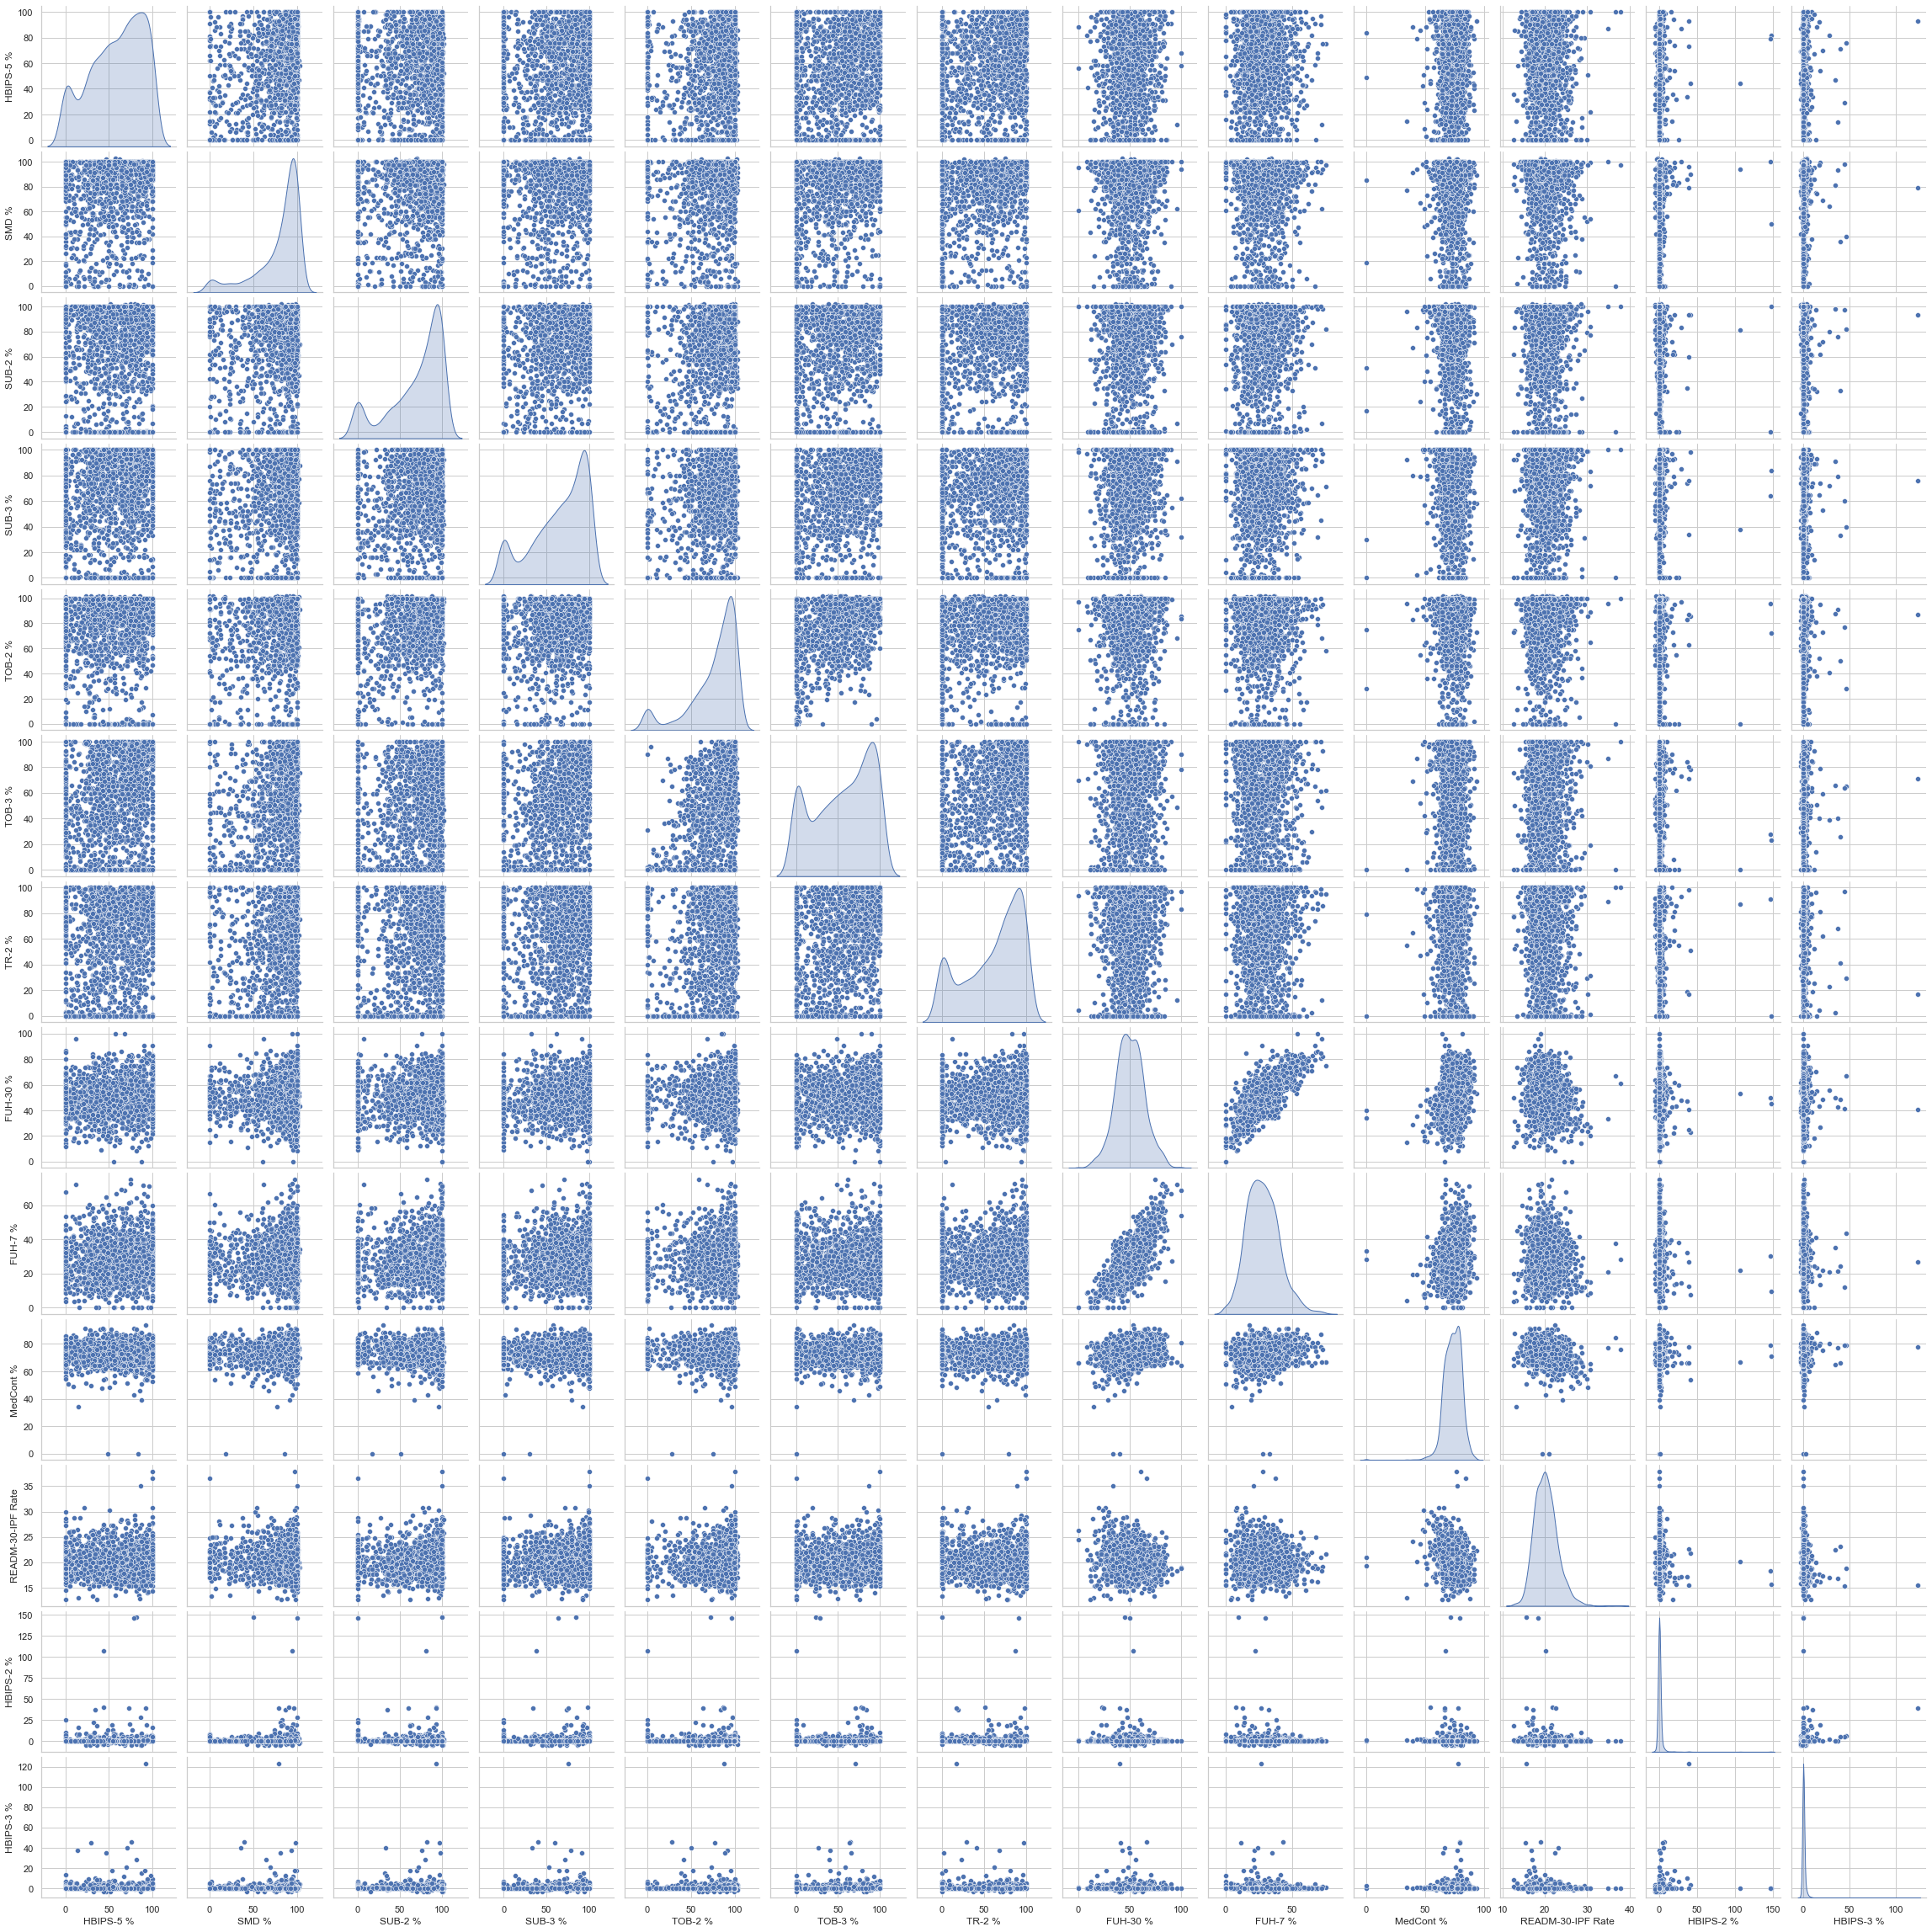

In [55]:
sns.pairplot(hospital, vars = hospital.columns[4:], diag_kind="kde")
plt.show()

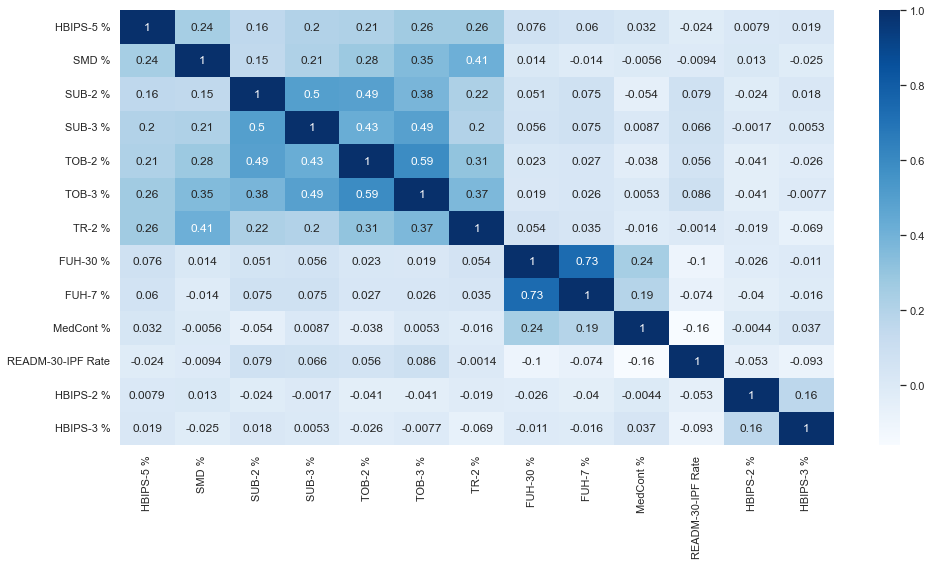

In [56]:
corr_df = hospital.loc[ : , hospital.columns!= 'ZIP Code'].corr()
sns.heatmap(corr_df, cmap="Blues", annot = True)
plt.show()

As we can see there is a slight positive correlation between FUH-30% & FUH-7%, TOB-2% & TOB-3%, TOB-2% & SUB-2%, and TOB-3% & SUB-3%. This shows us that of the facilites that perform follow ups after 7 days, they are more like to perform follow ups after 30 days. While the other pairs show that if a facility provides a certain type of substance use rehabilitation, they are more likely to have a wider range of substance use treatments that are provided both during and after hospilization. 

Now let's incorporate national-level percentages of measures to see what facilities are providing above standard/average care to their inpatient patients. 

First we will bring in a new hospital dataframe created with a SQL Left Join to produce the Latitude and Longitude location of each facility. Here we will also clean and input any locations missed by the join. 

Next we will create a function to determine the rating of each facility:
- At or Better Than National-Level (All Measures)
- Below National Average (All Measures)

In order for a facility to be at or better than the national-level we can consider the following from external research:
1. The use of psychiatric restraints is considered a “last resort” approach after all other measures to calm and support the person (verbal encouragement, medications, therapeutic activities, etc.) have failed. Physical restraints are only used to ensure the safety of the person in restraints and that of other patients and staff in the facility.(https://www.crisisprevention.com/Blog/Seclusion-and-Restraint-in-Psychiatric-Hospitals). 
    1. I.e. Hours of seclusion and physical restraint should remain low or at 0.
2. The rate of readmission after 30 days should be low because it indicates the quality of hospital care. It incentivizes hospitals to improve communication and care coordination efforts to better engage patients and caregivers on post-discharge planning. (https://www.cms.gov/Medicare/Quality-Initiatives-Patient-Assessment-Instruments/Value-Based-Programs/HRRP/Hospital-Readmission-Reduction-Program). 
    2. I.e. Readmission rates should also remain low because it indicates that patients are being properly addressed.

#### Thus, for a facility to be "At or Better Than National-Level (All Measures)" it must have a greater (or equal to) 'HBIPS-5 %', 'SMD %','SUB-2 %', 'SUB-3 %', 'TOB-2 %', 'TOB-3 %', 'TR-2 %', 'FUH-30 %','FUH-7 %', and 'MedCont %' percentage than the national-level rate. And, it must have a lower 'READM-30-IPF Rate', 'HBIPS-2 %', and 'HBIPS-3 %' percentage than the national-level rate. If all 13 measures thresholds are met, then the facility is at or better than the national-level. 

After rating each facility, we will map all the facilities on a map with their associated measure scores.

Which will be followed by a map showing the "At or Better Than National-Level (All Measures)" facilities and the "Below National Average" facilities.

In [57]:
hospital_zip = pd.read_csv("hospital_zip.csv")

In [58]:
hospital_zip.head()

Column1                   Facility Name        City State  ZIP Code  \
0        0        MIZELL MEMORIAL HOSPITAL         OPP    AL     36467   
1        1     CRENSHAW COMMUNITY HOSPITAL     LUVERNE    AL     36049   
2        2              ST. VINCENT'S EAST  BIRMINGHAM    AL     35235   
3        3  DEKALB REGIONAL MEDICAL CENTER  FORT PAYNE    AL     35968   
4        4   SHELBY BAPTIST MEDICAL CENTER   ALABASTER    AL     35007   

   HBIPS-5 %  SMD %  SUB-2 %  SUB-3 %  TOB-2 %  ...  READM-30-IPF Rate  \
0      100.0  100.0     38.0    100.0    100.0  ...               17.8   
1      100.0  100.0     21.0      3.0     95.0  ...               21.5   
2        0.0    5.0     28.0     15.0      2.0  ...               20.3   
3       76.0  100.0      0.0     36.0    100.0  ...               20.1   
4       34.0   95.0     90.0     95.0     84.0  ...               18.5   

   HBIPS-2 %  HBIPS-3 %     code        city  state     county  area_code  \
0       0.00       0.00  36467.0         Opp     AL  COVINGTON        NaN   
1       0.09       0.38  36049.0     Luverne     AL   CRENSHAW        NaN   
2       0.91       0.29  35235.0  Birmingham     AL  JEFFERSON        NaN   
3       0.00       0.00  35968.0  Fort Payne     AL    DE KALB        NaN   
4       0.00       0.00  35007.0   Alabaster     AL     SHELBY        NaN   

         lat        lon  
0  31.260401 -86.356208  
1  31.754655 -86.291595  
2  33.632816 -86.649293  
3  34.507242 -85.797851  
4  33.193415 -86.794377  

[5 rows x 25 columns]

In [59]:
hospital_zip.drop(columns = ['Column1', 'county','code', 'city', 'state', 'area_code'], inplace = True)

In [60]:
hospital_zip.isnull().sum()

Facility Name        0
City                 0
State                0
ZIP Code             0
HBIPS-5 %            0
SMD %                0
SUB-2 %              0
SUB-3 %              0
TOB-2 %              0
TOB-3 %              0
TR-2 %               0
FUH-30 %             0
FUH-7 %              0
MedCont %            0
READM-30-IPF Rate    0
HBIPS-2 %            0
HBIPS-3 %            0
lat                  9
lon                  9
dtype: int64

In [61]:
#Input the missing lat and long
hospital_zip.loc[hospital_zip['ZIP Code'] == 85392, 'lat'] = 33.435596
hospital_zip.loc[hospital_zip['ZIP Code'] == 85392, 'lon'] = -112.349602
hospital_zip.loc[hospital_zip['ZIP Code'] == 10065, 'lat'] = 40.764170
hospital_zip.loc[hospital_zip['ZIP Code'] == 10065, 'lon'] = -73.962365
hospital_zip.loc[hospital_zip['ZIP Code'] == 698, 'lat'] = 18.034964
hospital_zip.loc[hospital_zip['ZIP Code'] == 698, 'lon'] = -66.849898
hospital_zip.loc[hospital_zip['ZIP Code'] == 919, 'lat'] = 18.468300
hospital_zip.loc[hospital_zip['ZIP Code'] == 919, 'lon'] = -66.106100
hospital_zip.loc[hospital_zip['ZIP Code'] == 641, 'lat'] = 18.279721
hospital_zip.loc[hospital_zip['ZIP Code'] == 641, 'lon'] = -66.689096 
hospital_zip.loc[hospital_zip['ZIP Code'] == 739, 'lat'] = 18.176915
hospital_zip.loc[hospital_zip['ZIP Code'] == 739, 'lon'] = -66.153424
hospital_zip.loc[hospital_zip['ZIP Code'] == 928, 'lat'] = 18.468300
hospital_zip.loc[hospital_zip['ZIP Code'] == 928, 'lon'] = -66.106100
hospital_zip.loc[hospital_zip['ZIP Code'] == 623, 'lat'] = 18.040203
hospital_zip.loc[hospital_zip['ZIP Code'] == 623, 'lon'] = -67.146574
hospital_zip.loc[hospital_zip['ZIP Code'] == 705, 'lat'] = 18.135403
hospital_zip.loc[hospital_zip['ZIP Code'] == 705, 'lon'] = -66.260518 

In [62]:
hospital_zip.isnull().sum()

Facility Name        0
City                 0
State                0
ZIP Code             0
HBIPS-5 %            0
SMD %                0
SUB-2 %              0
SUB-3 %              0
TOB-2 %              0
TOB-3 %              0
TR-2 %               0
FUH-30 %             0
FUH-7 %              0
MedCont %            0
READM-30-IPF Rate    0
HBIPS-2 %            0
HBIPS-3 %            0
lat                  0
lon                  0
dtype: int64

In [63]:
hospital_zip.columns

Index(['Facility Name', 'City', 'State', 'ZIP Code', 'HBIPS-5 %', 'SMD %',
       'SUB-2 %', 'SUB-3 %', 'TOB-2 %', 'TOB-3 %', 'TR-2 %', 'FUH-30 %',
       'FUH-7 %', 'MedCont %', 'READM-30-IPF Rate', 'HBIPS-2 %', 'HBIPS-3 %',
       'lat', 'lon'],
      dtype='object')

In [64]:
national.values

array([[64.  , 77.  , 79.  , 75.  , 81.  , 61.  , 60.  , 49.5 , 27.9 ,
        73.1 , 20.2 ,  0.63,  0.61]])

In [65]:
def my_fun (m1,m2,m3,m4,m5,m6,m7, m8, m9, m10, m11, m12, m13, var14):
    hospital_zip[var14]= np.where((hospital_zip[m1] >= 64) & (hospital_zip[m2] >= 77) & (hospital_zip[m3] >= 79) & (hospital_zip[m4] >= 75) & (hospital_zip[m5] >= 81) & (hospital_zip[m6] >= 61) & (hospital_zip[m7] >= 60) & (hospital_zip[m8] >= 49.5) & (hospital_zip[m9] >= 27.9) & (hospital_zip[m10] >= 73.1) & (hospital_zip[m11] <= 20.2) & (hospital_zip[m12] <= .63) & (hospital_zip[m13] <= .61), "At or Better Than National-Level (All Measures)", "Below National Average (All Measures)")
    return hospital_zip

hospital_zip = my_fun('HBIPS-5 %', 'SMD %','SUB-2 %', 'SUB-3 %', 'TOB-2 %', 'TOB-3 %', 'TR-2 %', 'FUH-30 %','FUH-7 %', 'MedCont %', 'READM-30-IPF Rate', 'HBIPS-2 %', 'HBIPS-3 %', "Rating")
hos_best = hospital_zip[hospital_zip["Rating"] == "At or Better Than National-Level (All Measures)"]

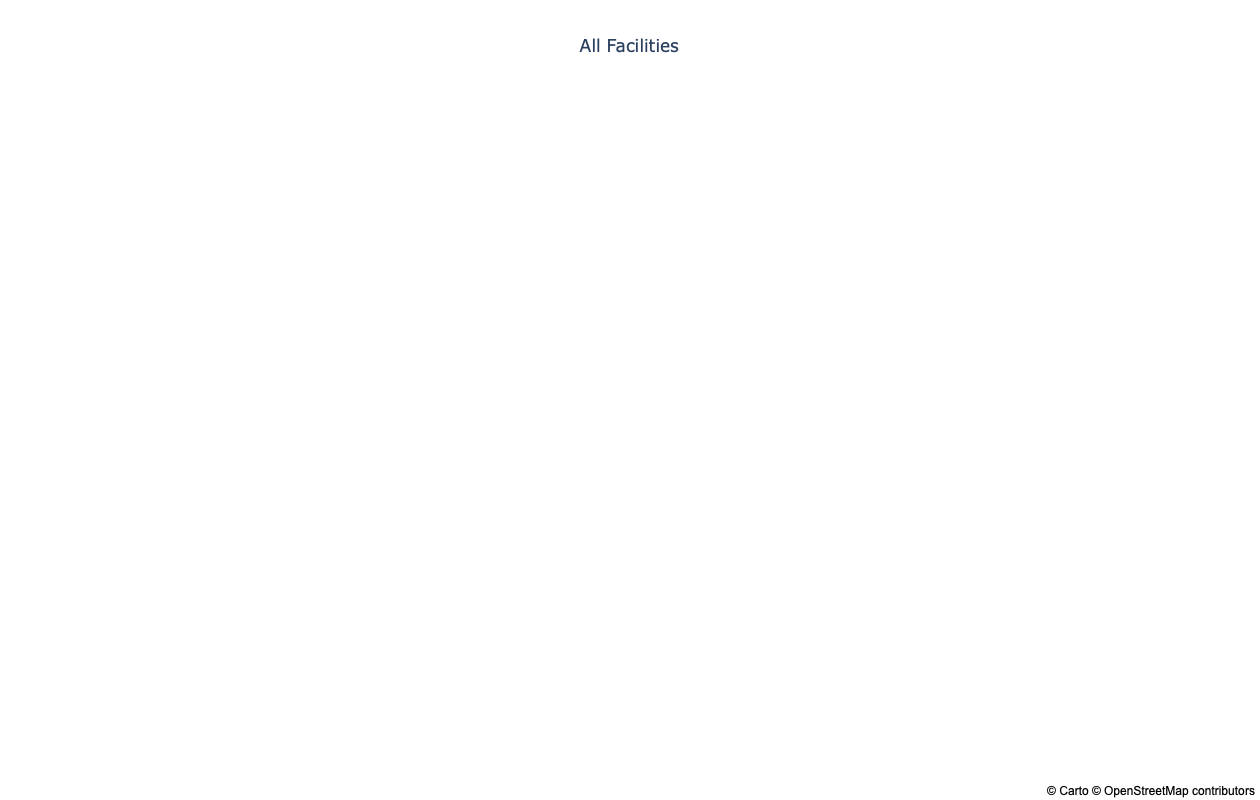

In [66]:
fig = px.scatter_mapbox(hospital_zip,
                        lat="lat",
                        lon="lon",
                        title = "All Facilities",
                        zoom = 2.75,
                        hover_name="Facility Name",
                        hover_data= ['Rating','HBIPS-5 %', 'SMD %','SUB-2 %', 'SUB-3 %', 'TOB-2 %', 'TOB-3 %', 'TR-2 %', 'FUH-30 %','FUH-7 %', 'MedCont %', 'READM-30-IPF Rate', 'HBIPS-2 %', 'HBIPS-3 %'], 
                        height=800,
                        width=800)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":2,"t":0,"l":0,"b":0})
fig.update_layout(title_x=0.5, title_y=.95)
d = {"At or Better Than National-Level (All Measures)": "red", "Below National Average (All Measures)": "blue"}
colors=[d[k] for k in hospital_zip['Rating'].values]
fig.update_traces(marker_size = 5, marker_color = colors )
fig.show()

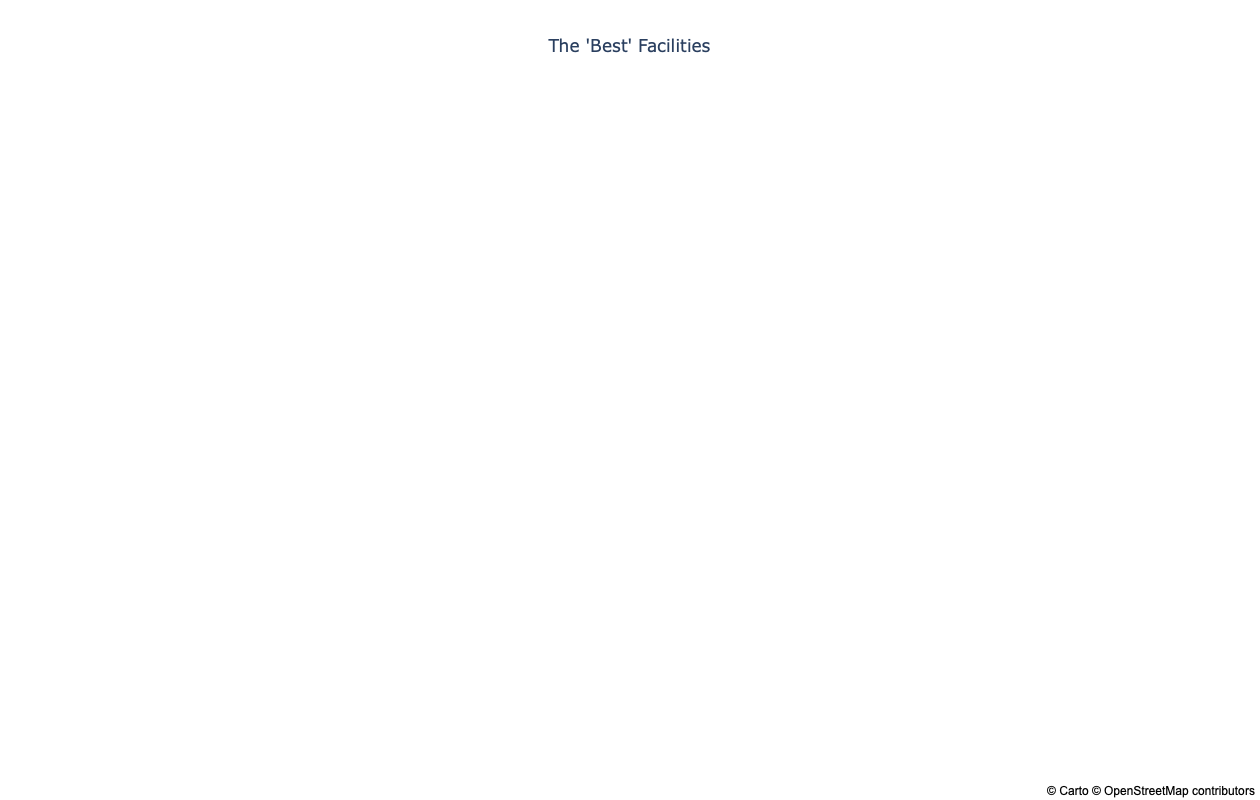

In [67]:
fig = px.scatter_mapbox(hos_best,
                        lat="lat",
                        lon="lon",
                        title = "The 'Best' Facilities",
                        zoom = 2.75,
                        hover_name= "Facility Name",
                        hover_data= ['Rating','HBIPS-5 %', 'SMD %','SUB-2 %', 'SUB-3 %', 'TOB-2 %', 'TOB-3 %', 'TR-2 %', 'FUH-30 %','FUH-7 %', 'MedCont %', 'READM-30-IPF Rate', 'HBIPS-2 %', 'HBIPS-3 %'], 
                        height=800,
                        width=800)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":2,"t":0,"l":0,"b":0})
fig.update_layout(title_x=0.5, title_y=.95)
fig.update_layout(showlegend=True)
fig.update_traces(marker_size = 5, marker_color = "red")
fig.show()

In [68]:
hos_below = hospital_zip[hospital_zip["Rating"] == "Below National Average (All Measures)"]

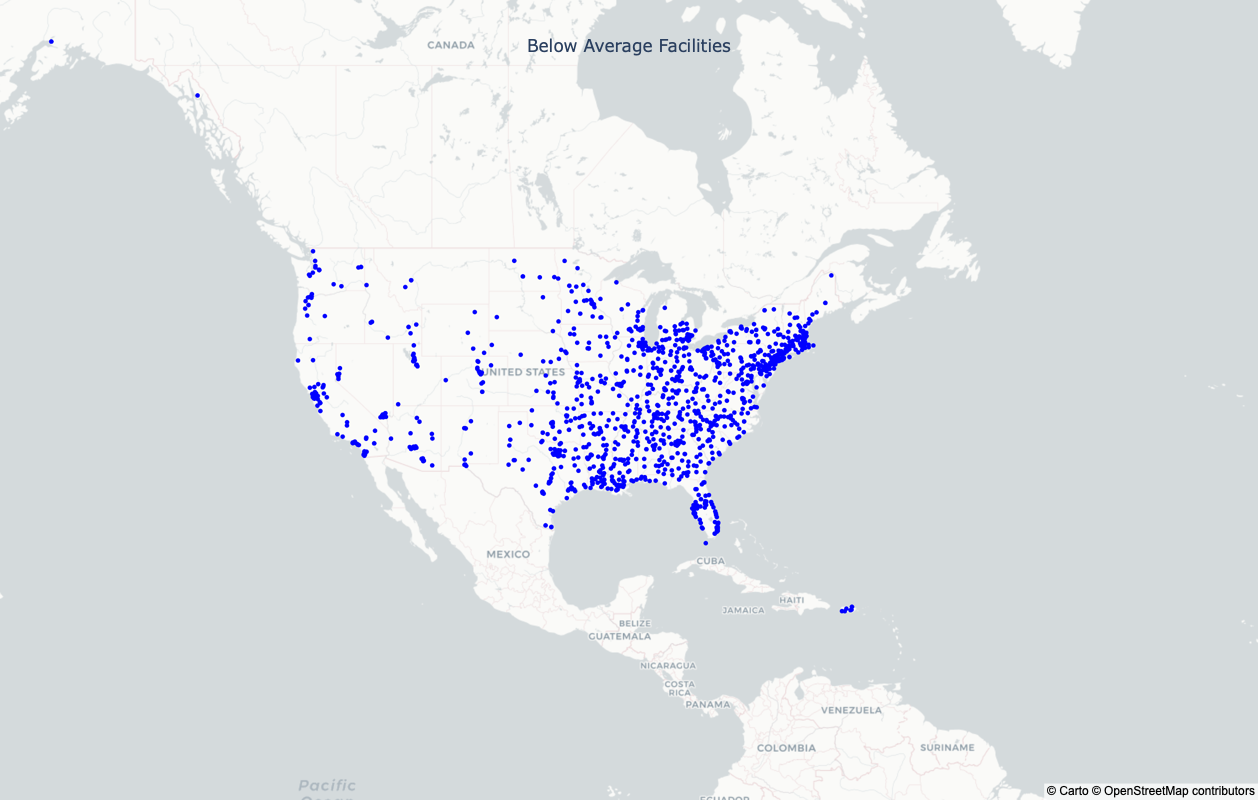

In [69]:
fig = px.scatter_mapbox(hos_below,
                        lat="lat",
                        lon="lon",
                        title = "Below Average Facilities",
                        zoom = 2.75,
                        hover_name= "Facility Name",
                        hover_data= ['Rating','HBIPS-5 %', 'SMD %','SUB-2 %', 'SUB-3 %', 'TOB-2 %', 'TOB-3 %', 'TR-2 %', 'FUH-30 %','FUH-7 %', 'MedCont %', 'READM-30-IPF Rate', 'HBIPS-2 %', 'HBIPS-3 %'], 
                        height=800,
                        width=800)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":2,"t":0,"l":0,"b":0})
fig.update_layout(title_x=0.5, title_y=.95)
fig.update_traces(marker_size = 5, marker_color = "blue")
fig.show()

In [70]:
hos_best.shape

(23, 20)

In [71]:
hos_below.shape

(1540, 20)

There are 23 facilities that fall under the "At or Better Than National-Level" for **each** measure. And there are 1540 facilities that fall "Below National Average". 

Note: These facilities are being ranked by *all* their measures being *better* than the national averages. 

Thus, while there are a lot of facilities that fall *under* the national average, it is important to note that this is because at **minimum one of their measures were below the average**. So, there are facilities that are performing well and providing adequate care to their patients that did not fall under the "At or Better Than National-Level" rating. 

Thus, let's see the distribution frequency of each measure accompanied by where the national average lies for each specific measure.

In [72]:
#Create colors based off CMS logo
from turtle import *
from time import *

colors = {'cmsblue': "#1c4e9d", 'cmsyellow': "#f0ca06"}

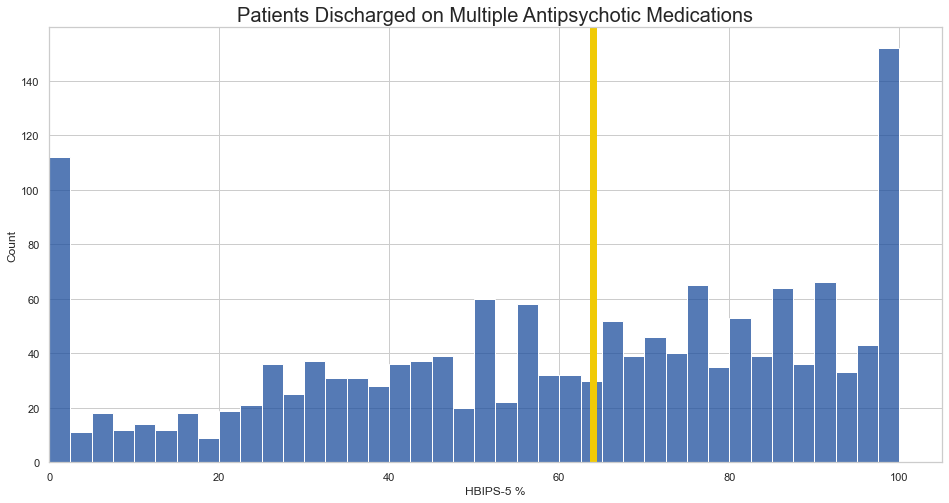

In [73]:
sns.histplot(x = hospital['HBIPS-5 %'], color = colors['cmsblue'], bins = 40)
plt.title("Patients Discharged on Multiple Antipsychotic Medications", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N HBIPS-5 %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

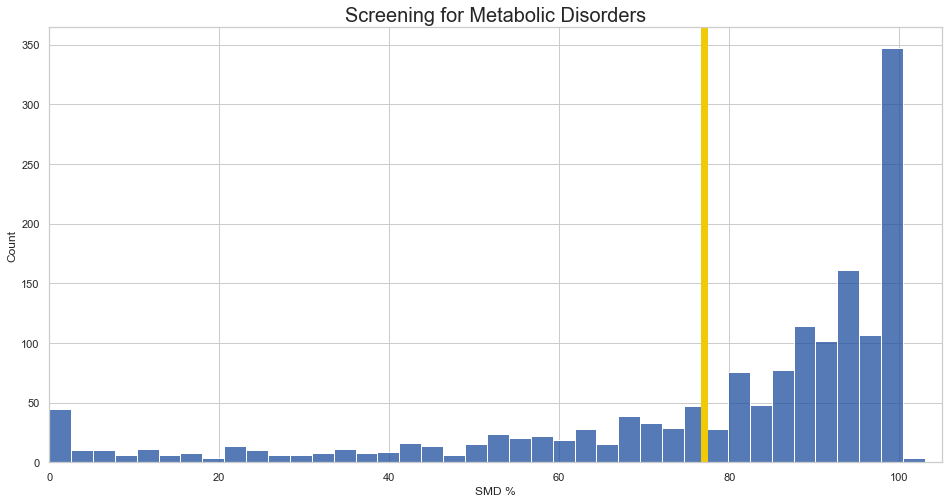

In [74]:
sns.histplot(x = hospital['SMD %'], color = colors['cmsblue'], bins = 40)
plt.title("Screening for Metabolic Disorders", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N SMD %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

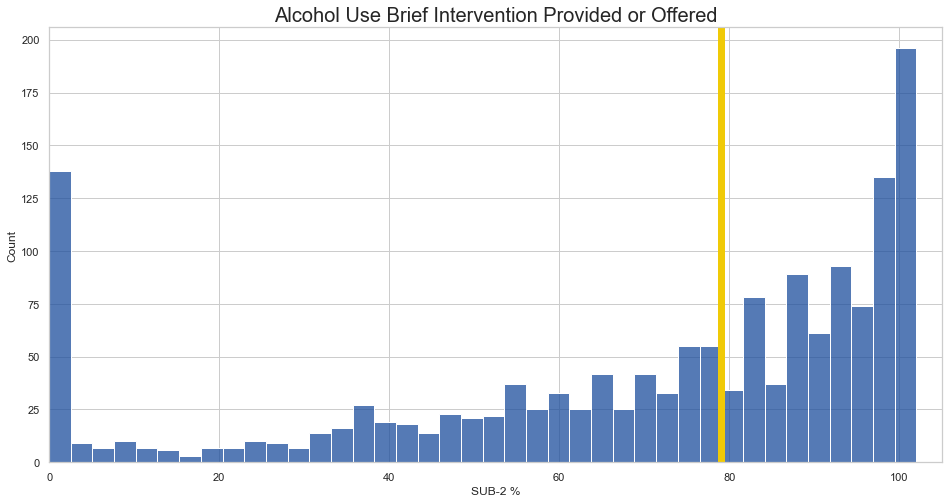

In [75]:
sns.histplot(x = hospital['SUB-2 %'], color = colors['cmsblue'], bins = 40)
plt.title("Alcohol Use Brief Intervention Provided or Offered", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N SUB-2 %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

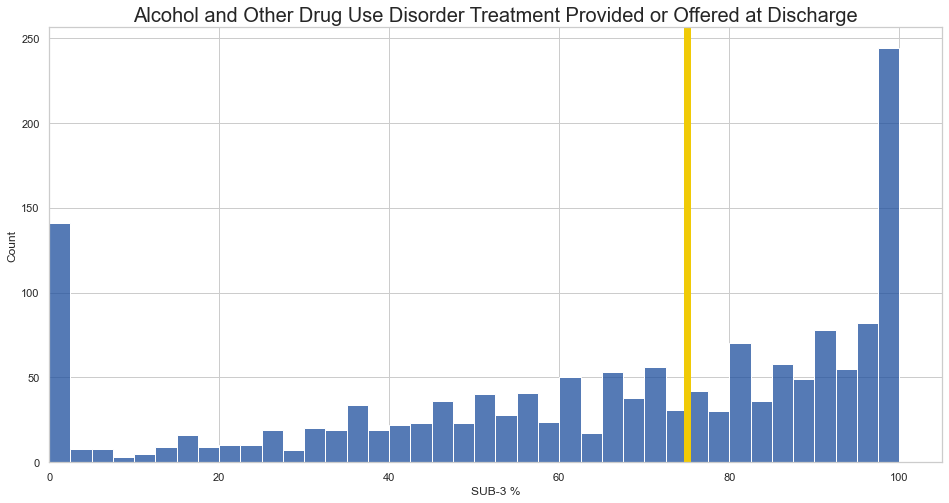

In [76]:
sns.histplot(x = hospital['SUB-3 %'], color = colors['cmsblue'], bins = 40)
plt.title("Alcohol and Other Drug Use Disorder Treatment Provided or Offered at Discharge", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N SUB-3 %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

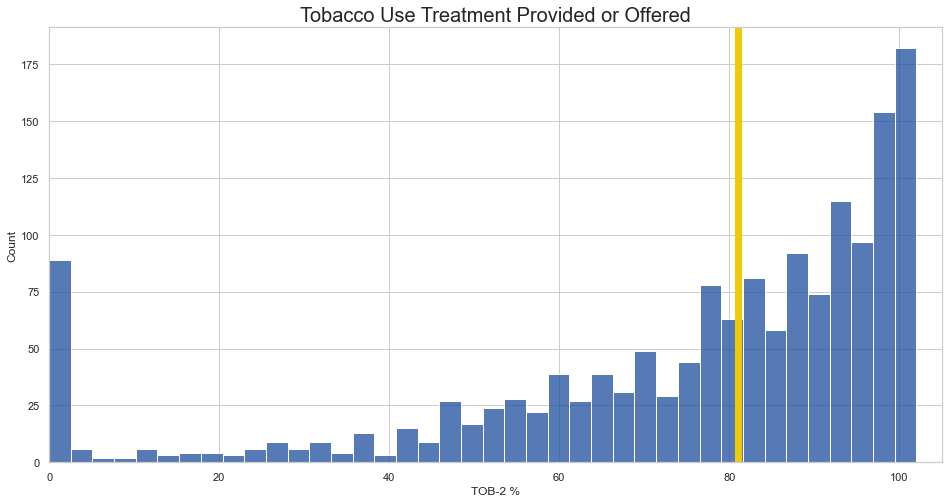

In [77]:
sns.histplot(x = hospital['TOB-2 %'], color = colors['cmsblue'], bins = 40)
plt.title("Tobacco Use Treatment Provided or Offered", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N TOB-2 %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

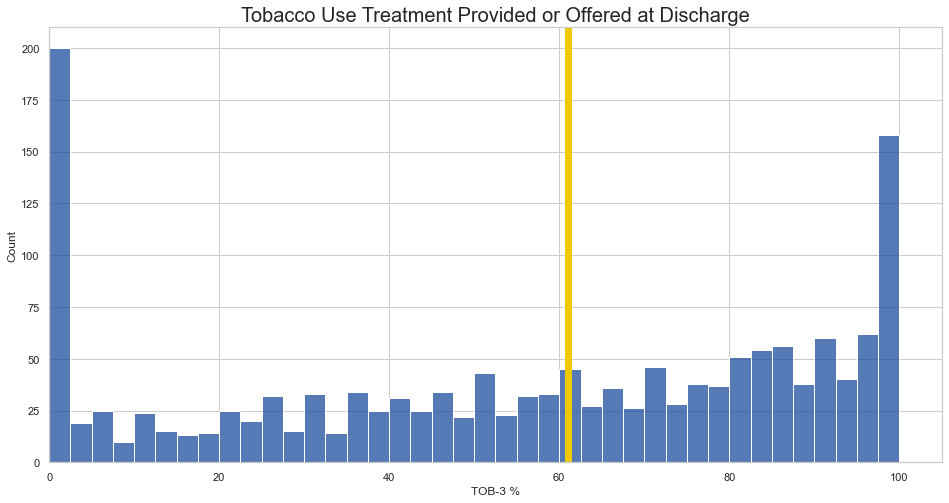

In [78]:
sns.histplot(x = hospital['TOB-3 %'], color = colors['cmsblue'], bins = 40)
plt.title("Tobacco Use Treatment Provided or Offered at Discharge", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N TOB-3 %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

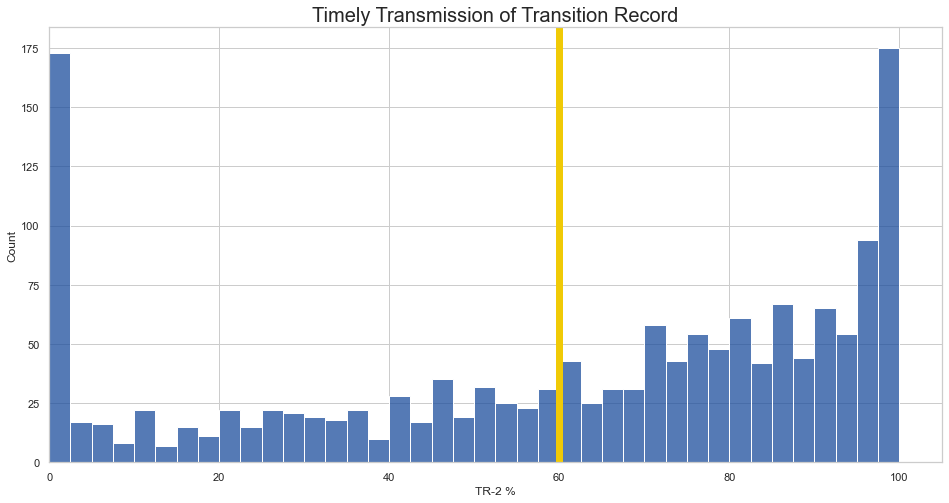

In [79]:
sns.histplot(x = hospital['TR-2 %'], color = colors['cmsblue'], bins = 40)
plt.title("Timely Transmission of Transition Record", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N TR-2 %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

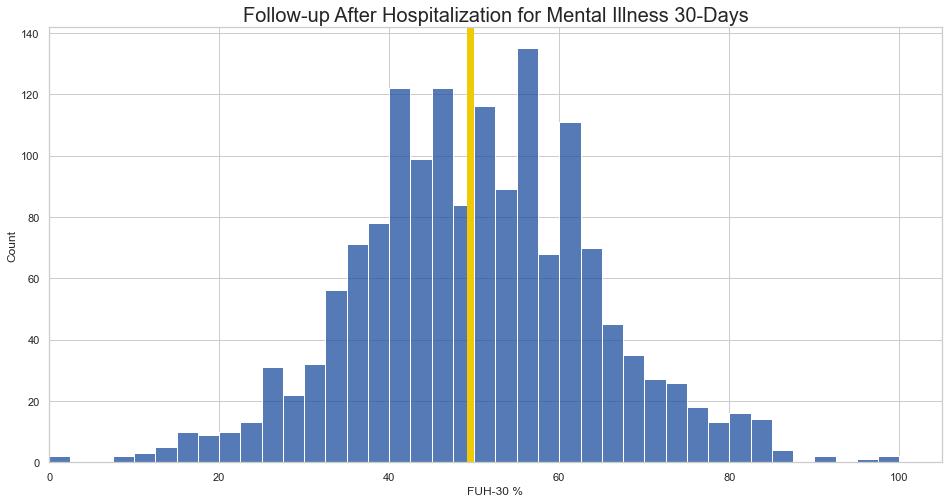

In [80]:
sns.histplot(x = hospital['FUH-30 %'], color = colors['cmsblue'], bins = 40)
plt.title("Follow-up After Hospitalization for Mental Illness 30-Days", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N FUH-30 %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

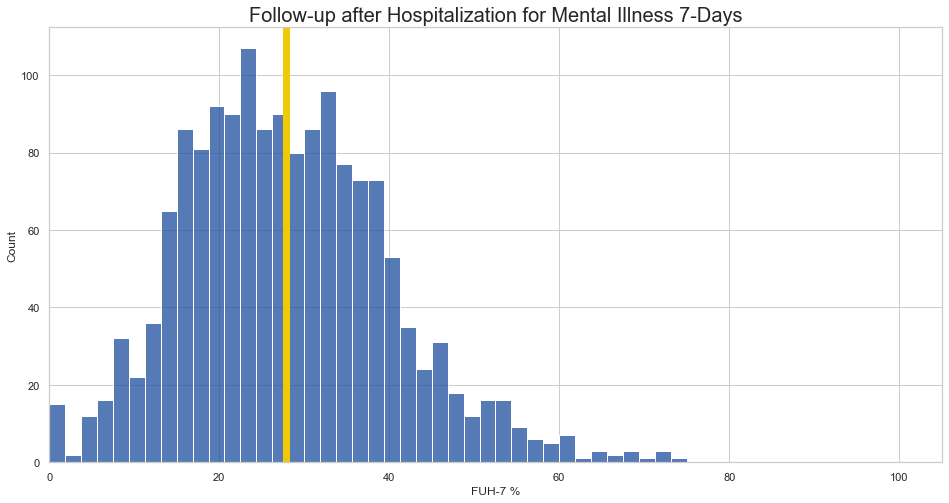

In [81]:
sns.histplot(x = hospital['FUH-7 %'], color = colors['cmsblue'], bins = 40)
plt.title("Follow-up after Hospitalization for Mental Illness 7-Days", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N FUH-7 %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

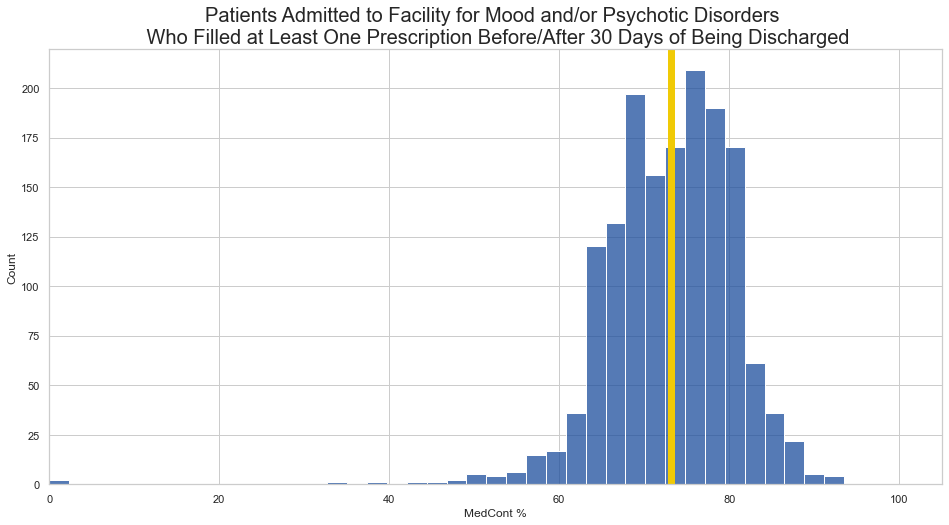

In [82]:
sns.histplot(x = hospital['MedCont %'], color = colors['cmsblue'], bins = 40)
plt.title("Patients Admitted to Facility for Mood and/or Psychotic Disorders \n Who Filled at Least One Prescription Before/After 30 Days of Being Discharged", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['MedCont %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

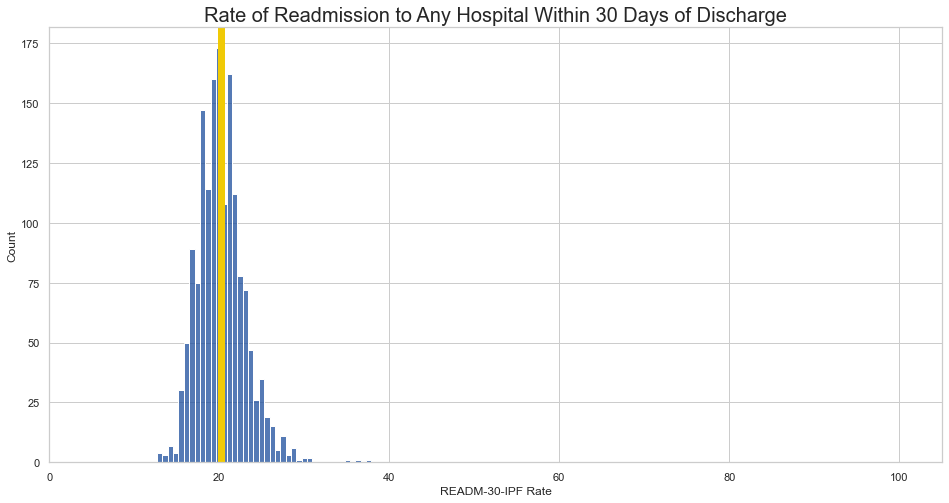

In [83]:
sns.histplot(x = hospital['READM-30-IPF Rate'], color = colors['cmsblue'], bins = 40)
plt.title("Rate of Readmission to Any Hospital Within 30 Days of Discharge", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['READM-30-IPF National Rate'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

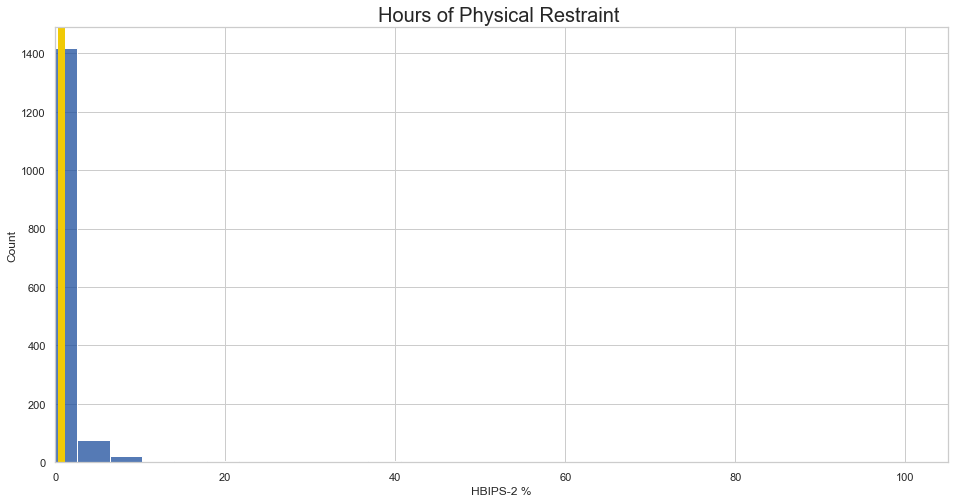

In [84]:
sns.histplot(x = hospital['HBIPS-2 %'], color = colors['cmsblue'], bins = 40)
plt.title("Hours of Physical Restraint ", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N HBIPS-2 %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

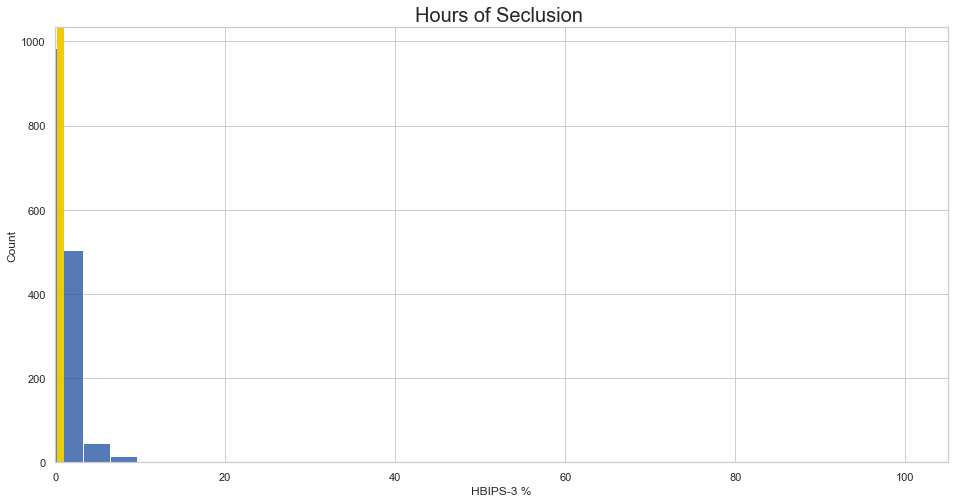

In [85]:
sns.histplot(x = hospital['HBIPS-3 %'], color = colors['cmsblue'], bins = 40)
plt.title("Hours of Seclusion ", fontsize = 20)
plt.xlim([0,105])
plt.axvline(national['N HBIPS-3 %'].values, color = colors['cmsyellow'], lw = 7)
plt.show()

In [86]:
measures = hospital.iloc[:,4:17].head()

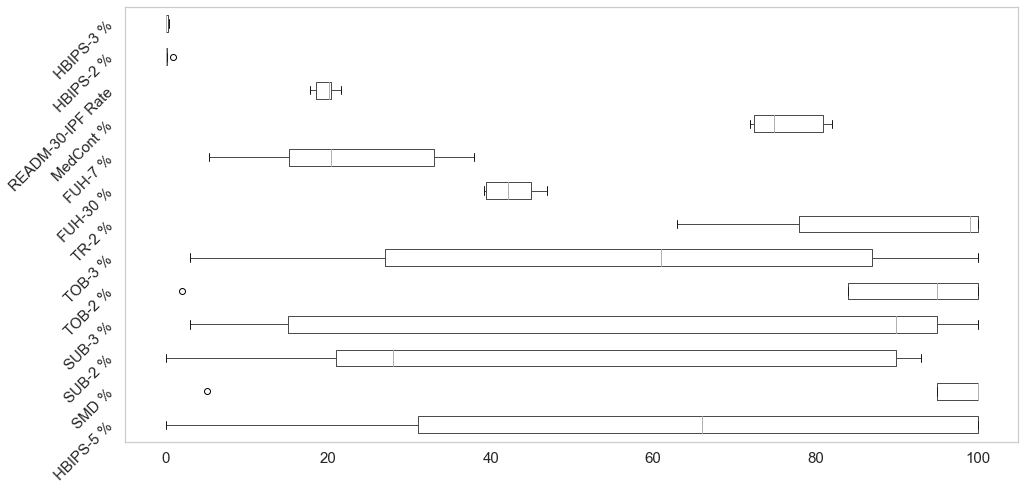

In [87]:
measures.boxplot(grid=False, rot=45, fontsize=15, vert = False)
plt.show()

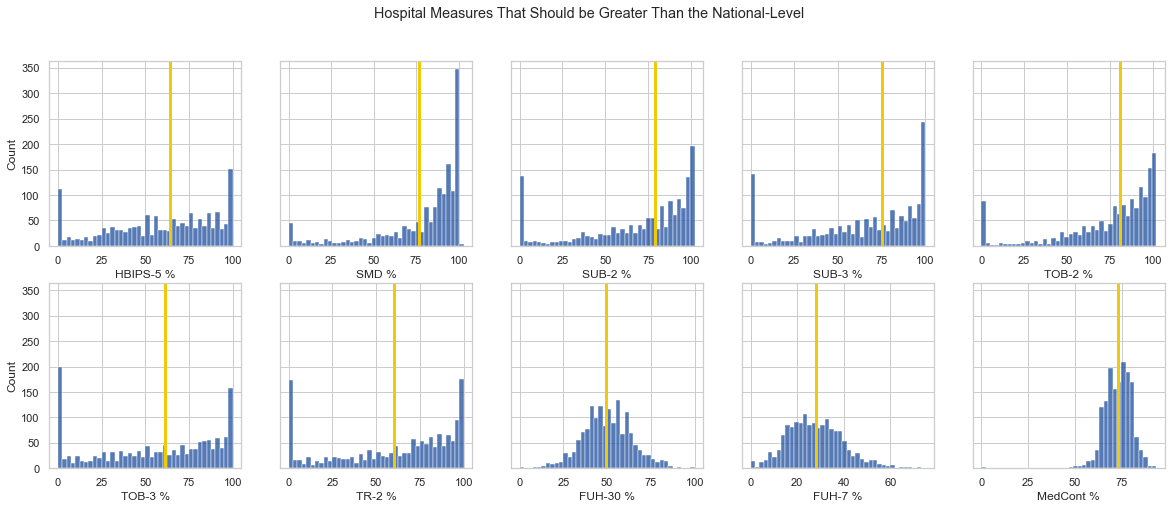

In [88]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7.5), sharey=True)
fig.suptitle('Hospital Measures That Should be Greater Than the National-Level')
sns.histplot(ax=axes[0,0], x = hospital['HBIPS-5 %'], color = colors['cmsblue'], bins = 40)
axes[0,0].axvline(national['N HBIPS-5 %'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[0, 1], x = hospital['SMD %'], color = colors['cmsblue'], bins = 40)
axes[0,1].axvline(national['N SMD %'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[0, 2], x = hospital['SUB-2 %'], color = colors['cmsblue'], bins = 40)
axes[0,2].axvline(national['N SUB-2 %'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[0, 3],x = hospital['SUB-3 %'], color = colors['cmsblue'], bins = 40)
axes[0,3].axvline(national['N SUB-3 %'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[0, 4], x = hospital['TOB-2 %'], color = colors['cmsblue'], bins = 40)
axes[0,4].axvline(national['N TOB-2 %'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[1,0], x = hospital['TOB-3 %'], color = colors['cmsblue'], bins = 40)
axes[1,0].axvline(national['N TOB-3 %'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[1, 1], x = hospital['TR-2 %'], color = colors['cmsblue'], bins = 40)
axes[1,1].axvline(national['N TR-2 %'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[1,2], x = hospital['FUH-30 %'], color = colors['cmsblue'], bins = 40)
axes[1,2].axvline(national['N FUH-30 %'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[1,3], x = hospital['FUH-7 %'], color = colors['cmsblue'], bins = 40)
axes[1,3].axvline(national['N FUH-7 %'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[1,4], x = hospital['MedCont %'], color = colors['cmsblue'], bins = 40)
axes[1,4].axvline(national['MedCont %'].values, color = colors['cmsyellow'], lw = 3)
plt.show()

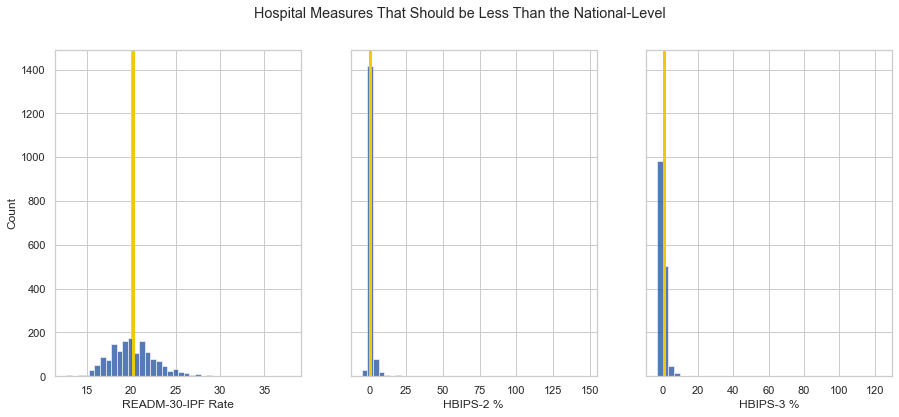

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Hospital Measures That Should be Less Than the National-Level')
sns.histplot(ax=axes[0], x = hospital['READM-30-IPF Rate'], color = colors['cmsblue'], bins = 40)
axes[0].axvline(national['READM-30-IPF National Rate'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[1], x = hospital['HBIPS-2 %'], color = colors['cmsblue'], bins = 40)
axes[1].axvline(national['N HBIPS-2 %'].values, color = colors['cmsyellow'], lw = 3)
sns.histplot(ax=axes[2], x = hospital['HBIPS-3 %'], color = colors['cmsblue'], bins = 40)
axes[2].axvline(national['N HBIPS-3 %'].values, color = colors['cmsyellow'], lw = 3)
plt.show()

As we can see, in a majority of the measures, there is a lot more than just 23 facilities surpassing the national average. 

Certain facilities perform better in certain areas than others. 

# Task 8: Conclusions

Overall, there were 23 facilities, based off of all measures, that go beyond the national-level of performance. However, this does not mean that the facilities rated “Below National-Level” are not providing quality care to their patients.  Viewing the 13 Quality Measures independently allowed us to understand which areas of the facility need/can be improved. In a majority of the measures, there is are a lot more than 23 facilities surpassing the national-level of performance, indicating that certain facilities perform better in certain areas than others. Finally, in terms of improving IPFQR reporting quality, an added perspective from patients would provide an added layer of information for deciding what facilities are performing better or worse.
